In [190]:
import random
import numpy as np 
import matplotlib.pyplot as plt 
import time 


In [191]:
# Générer le graphe TSP incomplet
def generate_tsp_incomplete(num_sommets, max_poids_arete):
    matrice = [[None for _ in range(num_sommets)] for _ in range(num_sommets)]
    intervalles = {}
    for i in range(num_sommets):
        intervalle_start = random.randint(0, 10)
        intervalle_end = intervalle_start + random.randint(5, 20)
        intervalles[i] = (intervalle_start, intervalle_end)
    for i in range(num_sommets):
        for j in range(i + 1, num_sommets):
            if random.choice([True, False]):
                poids = random.randint(1, max_poids_arete)
                matrice[i][j] = poids
                matrice[j][i] = poids
    for i in range(num_sommets):
        pas_connexe = True
        for j in range(num_sommets):
            if matrice[i][j] is None:
                matrice[i][j] = float('inf')
            else:
                pas_connexe = False
        if pas_connexe:
            poids = random.randint(1, max_poids_arete)
            matrice[i][num_sommets-1] = poids
            matrice[num_sommets-1][i] = poids
    return matrice, intervalles 

In [192]:
# Générer les données du problème
num_sommets = 5
max_poids_arete = 10
tsp_matrice, tsp_intervalles = generate_tsp_incomplete(num_sommets, max_poids_arete) 
print("\nMatrice pondérée:")
for row in tsp_matrice:
    print(row)  
# Afficher les intervalles 
print("\nIntervalles des sommets")
print(tsp_intervalles)   


Matrice pondérée:
[inf, inf, 8, 3, 1]
[inf, inf, 5, inf, inf]
[8, 5, inf, inf, 1]
[3, inf, inf, inf, inf]
[1, inf, 1, inf, inf]

Intervalles des sommets
{0: (2, 15), 1: (6, 20), 2: (0, 8), 3: (5, 24), 4: (9, 27)}


In [193]:
def calculate_path_length(matrice, solution):
    # Calculate the total length of the path
    length = 0
    for i in range(len(solution) - 1):
        length += matrice[solution[i]][solution[i + 1]]
    length += matrice[solution[-1]][solution[0]]  # return to the start point
    return length 


In [194]:
def is_valid_solution(solution, matrice, intervalles):
    # Validate if the solution respects the interval constraints
    path_length = calculate_path_length(matrice, solution)
    for city in range(len(solution)):
        min_weight, max_weight = intervalles[city]
        if not (min_weight <= path_length <= max_weight):
            return False 
    return True 

In [195]:
def generate_neighbor_solution(current_solution, matrice, intervalles):
    # Generate a neighboring solution that respects the interval constraints
    attempts = 0
    while attempts < 100:  # Limit the number of attempts to avoid infinite loops
        neighbor = current_solution[:]
        i, j = random.sample(range(len(neighbor)), 2)
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
        if is_valid_solution(neighbor, matrice, intervalles):
            return neighbor
        attempts += 1
    return current_solution  

In [196]:
def hill_climbing(matrice, intervalles , num_iterations=1000): 
    num_sommets = len(matrice)
    execution_times = []
    distances = [] 
    # Generate an initial random valid solution
    while True:
        start_time = time.time()
        current_solution = list(range(num_sommets))
        random.shuffle(current_solution)
        if is_valid_solution(current_solution, matrice, intervalles):
            break
    current_length = calculate_path_length(matrice, current_solution)
    
    for _ in range(num_iterations):
        # Generate a valid neighboring solution
        next_solution = generate_neighbor_solution(current_solution, matrice, intervalles)
        next_length = calculate_path_length(matrice, next_solution)
        
        # If the neighboring solution is better, adopt it
        if next_length < current_length:
            current_solution = next_solution
            current_length = next_length
        
        end_time = time.time()
        execution_times.append(end_time - start_time)
        distances.append(current_length)  # Record the distance, not the solution
    
    return current_solution, current_length, execution_times, distances 
 

In [197]:
def plot_route(path, points):
    plt.figure(figsize=(10, 5))
    plt.scatter(points[:, 0], points[:, 1], c='blue')
    for i in range(len(path) - 1):
        from_node = path[i]
        to_node = path[i + 1]
        plt.plot([points[from_node, 0], points[to_node, 0]], [points[from_node, 1], points[to_node, 1]], 'k-')
    plt.title('Best Route Found')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()    

In [198]:
def plot_performance(execution_times, distances):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Execution Time (s)', color=color)
    ax1.plot(execution_times, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Best Path Length', color=color)  
    ax2.plot(distances, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()   
    plt.title('Performance Over Iterations')
    plt.show() 

Meilleure tournée : [1, 4, 2, 3, 0]
Distance totale : 20
Sommet 0 (Intervalle : (8, 20))
Sommet 1 (Intervalle : (6, 20))
Sommet 2 (Intervalle : (4, 12))
Sommet 3 (Intervalle : (10, 24))
Sommet 4 (Intervalle : (0, 15))


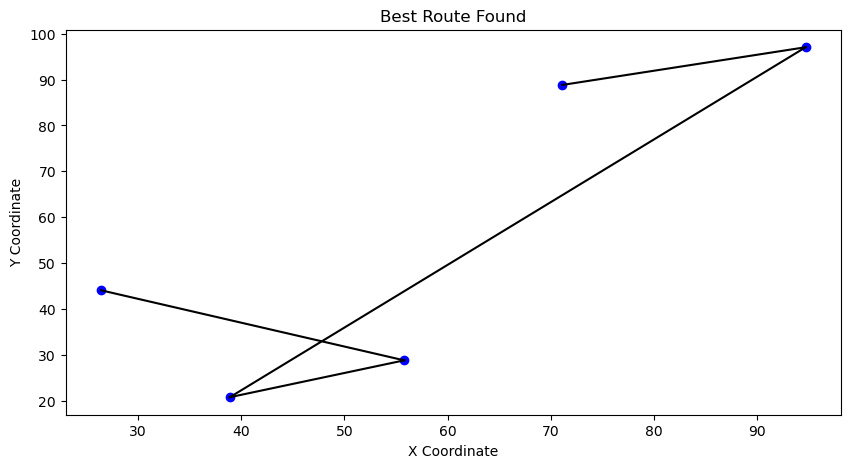

In [199]:
import random

def generate_tsp_incomplete(num_sommets, max_poids_arete):
    matrice = [[None for _ in range(num_sommets)] for _ in range(num_sommets)]
    intervalles = {}
    for i in range(num_sommets):
        intervalle_start = random.randint(0, 10)
        intervalle_end = intervalle_start + random.randint(5, 20)
        intervalles[i] = (intervalle_start, intervalle_end)
    for i in range(num_sommets):
        for j in range(i + 1, num_sommets):
            if random.choice([True, False]):
                poids = random.randint(1, max_poids_arete)
                matrice[i][j] = poids
                matrice[j][i] = poids
    for i in range(num_sommets):
        pas_connexe = True
        for j in range(num_sommets):
            if matrice[i][j] is None:
                matrice[i][j] = float('inf')
            else:
                pas_connexe = False
        if pas_connexe:
            poids = random.randint(1, max_poids_arete)
            matrice[i][num_sommets-1] = poids
            matrice[num_sommets-1][i] = poids
    return matrice, intervalles

def hill_climbing_tsp_incomplete(matrice, intervalles, max_iter):
    tournee_actuelle = list(range(num_sommets))
    random.shuffle(tournee_actuelle)
    meilleure_tournee = tournee_actuelle.copy()
    meilleure_distance = distance_tournee(tournee_actuelle, matrice)

    for _ in range(max_iter):
        voisin = generate_voisin(tournee_actuelle)
        if est_valide(voisin, intervalles):
            distance_voisin = distance_tournee(voisin, matrice)
            if distance_voisin < meilleure_distance:
                meilleure_tournee = voisin.copy()
                meilleure_distance = distance_voisin

    return meilleure_tournee, meilleure_distance

def distance_tournee(tournee, matrice):
    distance = 0
    for i in range(len(tournee) - 1):
        distance += matrice[tournee[i]][tournee[i + 1]]
    return distance

def est_valide(tournee, intervalles):
    for i in range(len(tournee) - 1):
        debut_i, fin_i = intervalles[tournee[i]]
        debut_j, fin_j = intervalles[tournee[i + 1]]
        if not (fin_i <= debut_j):
            return False
    return True

def generate_voisin(tournee):
    i, j = random.randint(0, len(tournee) - 1), random.randint(0, len(tournee) - 1)
    if i < j:
        tournee[i:j+1] = reversed(tournee[i:j+1])
    else:
        tournee[j:i+1] = tournee[j:i+1][::-1]
    return tournee
def print_solution(tournee, intervalles, matrice):
    print("Meilleure tournée :", tournee)
    print("Distance totale :", distance_tournee(tournee, matrice))
    for i in range(len(tournee)):
        print(f"Sommet {i} (Intervalle : {intervalles[i]})") 
num_sommets = 5
max_poids_arete = 10  
points = np.random.rand(num_sommets, 2) * 100  
matrice, intervalles = generate_tsp_incomplete(num_sommets, max_poids_arete)
# print("\nMatrice pondérée:")
# for row in tsp_matrice:
#     print(row)    
# Afficher les intervalles 
# print("\nIntervalles des sommets")
# print(tsp_intervalles)    
meilleure_tournee, meilleure_distance = hill_climbing_tsp_incomplete(matrice, intervalles, 1000)
print_solution(meilleure_tournee, intervalles, matrice)  
if meilleure_tournee:
    plot_route(meilleure_tournee, points)     

In [200]:
import random
import numpy as np

# Generate TSP incomplete graph and intervals
def generate_tsp_incomplete(num_sommets, max_poids_arete):
    matrice = [[None for _ in range(num_sommets)] for _ in range(num_sommets)]
    intervalles = {}
    for i in range(num_sommets):
        intervalle_start = random.randint(0, 10)
        intervalle_end = intervalle_start + random.randint(5, 20)
        intervalles[i] = (intervalle_start, intervalle_end)
    for i in range(num_sommets):
        for j in range(i + 1, num_sommets):
            if random.choice([True, False]):
                poids = random.randint(1, max_poids_arete)
                matrice[i][j] = poids
                matrice[j][i] = poids
    for i in range(num_sommets):
        pas_connexe = True
        for j in range(num_sommets):
            if matrice[i][j] is None:
                matrice[i][j] = float('inf')
            else:
                pas_connexe = False
        if pas_connexe:
            poids = random.randint(1, max_poids_arete)
            matrice[i][num_sommets-1] = poids
            matrice[num_sommets-1][i] = poids
    return matrice, intervalles

def distance_tournee(tournee, matrice, intervalles, penalty_factor):
    distance = 0
    for i in range(len(tournee) - 1):
        debut_i, fin_i = intervalles[tournee[i]]
        debut_j, fin_j = intervalles[tournee[i + 1]]
        # Penalty for violating interval constraint
        if not (fin_i <= debut_j):
            distance += penalty_factor * (debut_j - fin_i)
        distance += matrice[tournee[i]][tournee[i + 1]]
    # Add distance from last to first to complete the cycle
    debut_last, fin_last = intervalles[tournee[-1]]
    debut_first, fin_first = intervalles[tournee[0]]
    if not (fin_last <= debut_first):
        distance += penalty_factor * (debut_first - fin_last)
    distance += matrice[tournee[-1]][tournee[0]]
    return distance

def est_valide(tournee, intervalles):
    for i in range(len(tournee) - 1):
        debut_i, fin_i = intervalles[tournee[i]]
        debut_j, fin_j = intervalles[tournee[i + 1]]
        if not (fin_i <= debut_j):
            return False
    debut_last, fin_last = intervalles[tournee[-1]]
    debut_first, fin_first = intervalles[tournee[0]]
    if not (fin_last <= debut_first):
        return False
    return True

def generate_voisin(tournee):
    i, j = sorted(random.sample(range(len(tournee)), 2))
    new_tournee = tournee.copy()
    new_tournee[i:j+1] = reversed(new_tournee[i:j+1])
    return new_tournee

def improve_solution(tournee, matrice, intervalles, penalty_factor, max_improve_iter):
    for _ in range(max_improve_iter):
        improved = False
        for i in range(1, len(tournee) - 2):
            for j in range(i + 2, len(tournee)):
                new_tournee = tournee.copy()
                new_tournee[i:j] = reversed(new_tournee[i:j])
                if est_valide(new_tournee, intervalles):
                    new_distance = distance_tournee(new_tournee, matrice, intervalles, penalty_factor)
                    if new_distance < distance_tournee(tournee, matrice, intervalles, penalty_factor):
                        tournee = new_tournee.copy()
                        improved = True
                        break
            if improved:
                break
        if not improved:
            break
    return tournee

def hill_climbing_tsp_incomplete(matrice, intervalles, max_iter, penalty_factor, restart_threshold, max_improve_iter):
    tournee_actuelle = list(range(len(matrice)))
    random.shuffle(tournee_actuelle)
    meilleure_tournee = tournee_actuelle.copy()
    meilleure_distance = distance_tournee(tournee_actuelle, matrice, intervalles, penalty_factor)
    current_iterations = 0
    while current_iterations < max_iter:
        voisin = generate_voisin(tournee_actuelle)
        if est_valide(voisin, intervalles):
            distance_voisin = distance_tournee(voisin, matrice, intervalles, penalty_factor)
            if distance_voisin < meilleure_distance:
                meilleure_tournee = voisin.copy()
                meilleure_distance = distance_voisin
                current_iterations = 0  # Reset counter on improvement
            elif distance_voisin == meilleure_distance:
                # Accept same distance solution to avoid getting stuck
                meilleure_tournee = voisin.copy()
        current_iterations += 1
        # Restart if stuck with infinite distance for a certain number of iterations
        if meilleure_distance == float('inf') and current_iterations >= restart_threshold:
            tournee_actuelle = list(range(len(matrice)))
            random.shuffle(tournee_actuelle)
            current_iterations = 0
        # Apply iterative improvement after finding a valid solution
        if distance_voisin != float('inf'):
            meilleure_tournee = improve_solution(meilleure_tournee.copy(), matrice, intervalles, penalty_factor, max_improve_iter)
    return meilleure_tournee, meilleure_distance

def generate_multiple_solutions(num_sommets, max_poids_arete, num_solutions, max_iter, penalty_factor, restart_threshold, max_improve_iter):
    solutions = []
    for _ in range(num_solutions):
        matrice, intervalles = generate_tsp_incomplete(num_sommets, max_poids_arete)
        solution, distance = hill_climbing_tsp_incomplete(matrice, intervalles, max_iter, penalty_factor, restart_threshold, max_improve_iter)
        solutions.append((solution, distance))
    return solutions

# Example usage
num_sommets = 10
max_poids_arete = 100
num_solutions = 5  # Generate 5 solutions
max_iter = 1000
penalty_factor = 2  # Adjust penalty factor as needed
restart_threshold = 50
max_improve_iter = 10

solutions = generate_multiple_solutions(num_sommets, max_poids_arete, num_solutions, max_iter, penalty_factor, restart_threshold, max_improve_iter)

for solution, distance in solutions:
    print(f"Solution: {solution}, Distance: {distance}")


UnboundLocalError: cannot access local variable 'distance_voisin' where it is not associated with a value

In [ ]:
# points = np.random.rand(num_sommets, 2) * 100 
# print("\nMatrice pondérée:")
# for row in tsp_matrice:
#     print(row) 
# best_solution, best_length, execution_times, distances = hill_climbing(tsp_matrice, tsp_intervalles) 
   
# print(f"Solution trouvée : {best_solution} avec une longueur de chemin de : {best_length}")     
# if best_solution:
#     plot_route(best_solution, points)  

# # plot_performance(execution_times, distances)      